In [1]:
import numpy as np
import extq
import matplotlib.pyplot as plt
from matplotlib import ticker
import pyemma
import glob
import sys
import importlib
import gc
import sklearn
from sklearn import metrics
import ivac
import seaborn as sns

In [2]:
sys.path.insert(1, "../../python")
sys.path.insert(1, "../../..")
import util
import plotting
import kde

In [3]:
plt.style.use("seaborn-ticks")
sns.set_palette("colorblind")

# Load data

In [4]:
cv_trajs = np.load("../../data/raw_feat/cv_dist_spin_anton.npy", allow_pickle=True)
suppl_cvs = np.load("../../data/raw_feat/cv_dist_spin_suppl_00.npy", allow_pickle=True)
cv_trajs = [*cv_trajs, *suppl_cvs]

In [5]:
sb_labels = []
for r in ("R217", "R223", "R226", "R229", "R232"):
    for n in ("D129", "D136", "D151", "D164", "E183", "D186"):
        sb_labels.append(f"{r} - {n}")

In [6]:
remove = [
    1282,
    1283,
    1284,
    1285,
    1286,
    1288,
    1289,
    1290,
    1187,
    1188,
    1189,
    1190,
    1191,
    1197,
    1198,
    1199,
    1203,
    1205,
    1206,
    1207,
    1211,
    1212,
    1213,
    1214,
    1215,
    1225,
    1226,
    1227,
    1228,
    1231,
    1232,
    1233,
    1236,
    1237,
    1238,
    1242,
    1245,
    1246,
    1252,
    1253,
    1260,
    1261,
    1262,
    1263,
    1266,
    1267,
    1268,
    1269,
    1270,
    1271,
    1272,
    1273,
    1274,
    1275,
    1276,
    1277,
    1278,
    1279,
]

In [7]:
sb_trajs = np.load("../../data/raw_feat/feat2_raw_anton.npy", allow_pickle=True)
sb_trajs = [
    *sb_trajs,
    *np.load("../../data/raw_feat/feat2_suppl_00.npy", allow_pickle=True),
    *np.load("../../data/raw_feat/feat2_suppl_01.npy", allow_pickle=True),
    *np.load("../../data/raw_feat/feat2_suppl_02.npy", allow_pickle=True),
    *np.load("../../data/raw_feat/feat2_suppl_03.npy", allow_pickle=True),
]

In [8]:
cv_arr = np.concatenate(cv_trajs)
sb_arr = np.concatenate(sb_trajs)
print(cv_arr.shape, sb_arr.shape)

(3432000, 2) (3432000, 60)


In [9]:
suppl_xtcs = []
for i in range(83, 164):
    d = str(i).zfill(3)
    suppl_xtcs.append(f"../../suppl-runs/{d}/civsd_pro.xtc")
for j in range(2, 5):
    for i in range(83, 104):
        d = str(i).zfill(3)
        suppl_xtcs.append(f"../../suppl-runs/{d}/civsd_pro_{j}.xtc")
print(len(suppl_xtcs))

144


In [10]:
with np.load("../../data/raw_feat/feat5_suppl_00.npz") as f:
    suppl_feat5 = f["arr_0"]

In [11]:
print(len(suppl_feat5), suppl_feat5[0].shape)

144 (3000, 1924)


In [10]:
ivac_trajs = np.load("../../data/raw_feat/feat5_ivac_suppl.npy", allow_pickle=True)

In [11]:
print(len(ivac_trajs), ivac_trajs[0].shape)

381 (10000, 10)


# Plot projections

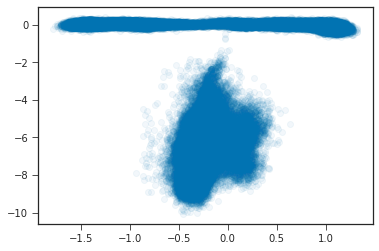

In [14]:
ivac_arr = np.concatenate(ivac_trajs)
end = len(ivac_arr)
plt.scatter(ivac_arr[:end:10, 1], ivac_arr[:end:10, 2], alpha=0.05)

[None]

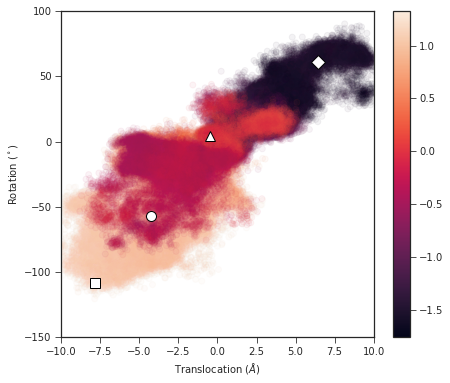

In [15]:
s = 20
f, ax = plt.subplots(figsize=(7, 6))
h = ax.scatter(
    cv_arr[::s, 0], cv_arr[::s, 1], c=ivac_arr[::s, 1], cmap="rocket", alpha=0.05
)
plotting.format_cvs(ax, centroids=True)
cb = plt.colorbar(h, ax=ax)
cb.solids.set(alpha=1)

[None]

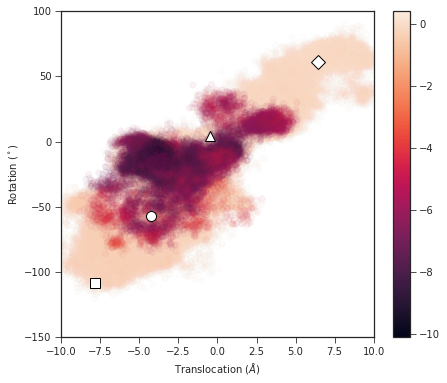

In [16]:
s = 20
f, ax = plt.subplots(figsize=(7, 6))
h = ax.scatter(
    cv_arr[::s, 0], cv_arr[::s, 1], c=ivac_arr[::s, 2], cmap="rocket", alpha=0.05
)
plotting.format_cvs(ax, centroids=True)
cb = plt.colorbar(h, ax=ax)
cb.solids.set(alpha=1)

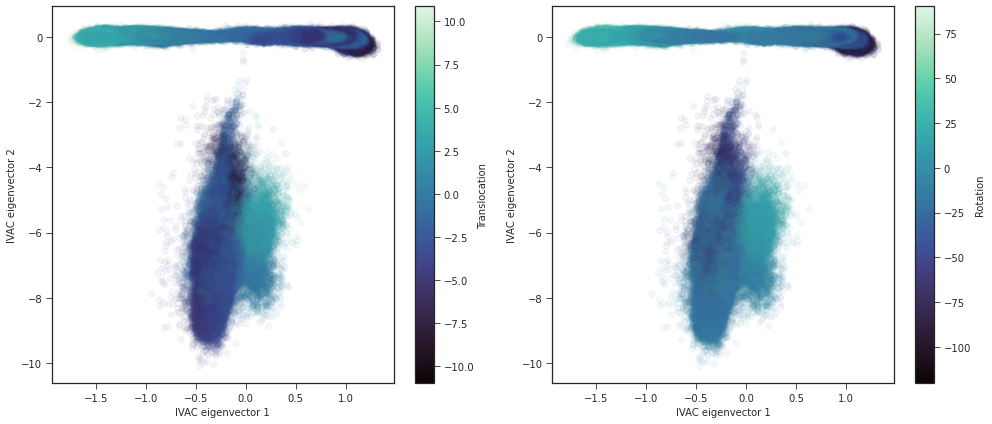

In [17]:
# project onto IVAC eigenvectors
f, axes = plt.subplots(1, 2, figsize=(14, 6))
labels = ("Translocation", "Rotation")
start = 0
end = len(ivac_arr)
for i, ax in enumerate(axes):
    h0 = ax.scatter(
        ivac_arr[start:end:10, 1],
        ivac_arr[start:end:10, 2],
        c=cv_arr[start::10, i],
        alpha=0.05,
        cmap="mako",
    )
    cbar = plt.colorbar(h0, ax=ax, label=labels[i])
    cbar.solids.set(alpha=1)
    ax.set(xlabel="IVAC eigenvector 1", ylabel="IVAC eigenvector 2")

f.tight_layout()

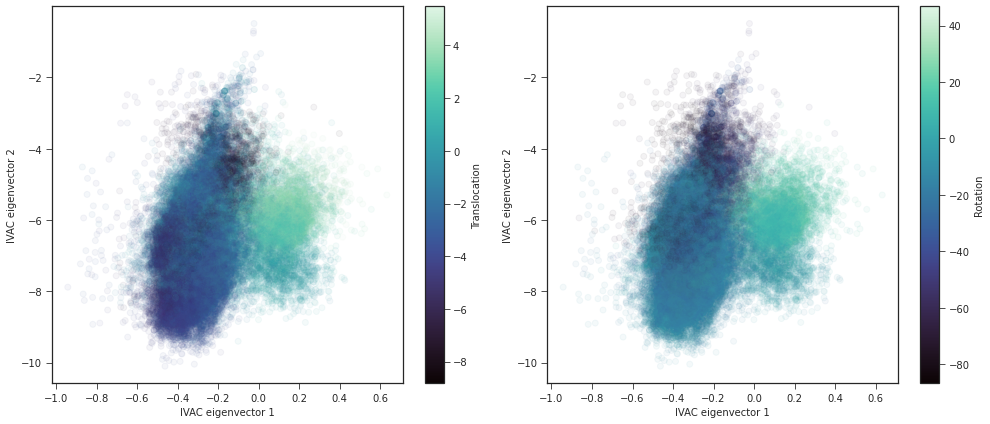

In [18]:
# project onto IVAC eigenvectors
f, axes = plt.subplots(1, 2, figsize=(14, 6))
labels = ("Translocation", "Rotation")
start = 3000000
end = len(ivac_arr)
s = 10
for i, ax in enumerate(axes):
    h0 = ax.scatter(
        ivac_arr[start:end:s, 1],
        ivac_arr[start:end:s, 2],
        c=cv_arr[start:end:s, i],
        alpha=0.05,
        cmap="mako",
    )
    cbar = plt.colorbar(h0, ax=ax, label=labels[i])
    cbar.solids.set(alpha=1)
    ax.set(xlabel="IVAC eigenvector 1", ylabel="IVAC eigenvector 2")

f.tight_layout()

In [19]:
sb_ids = [42, 48, 47, 53]

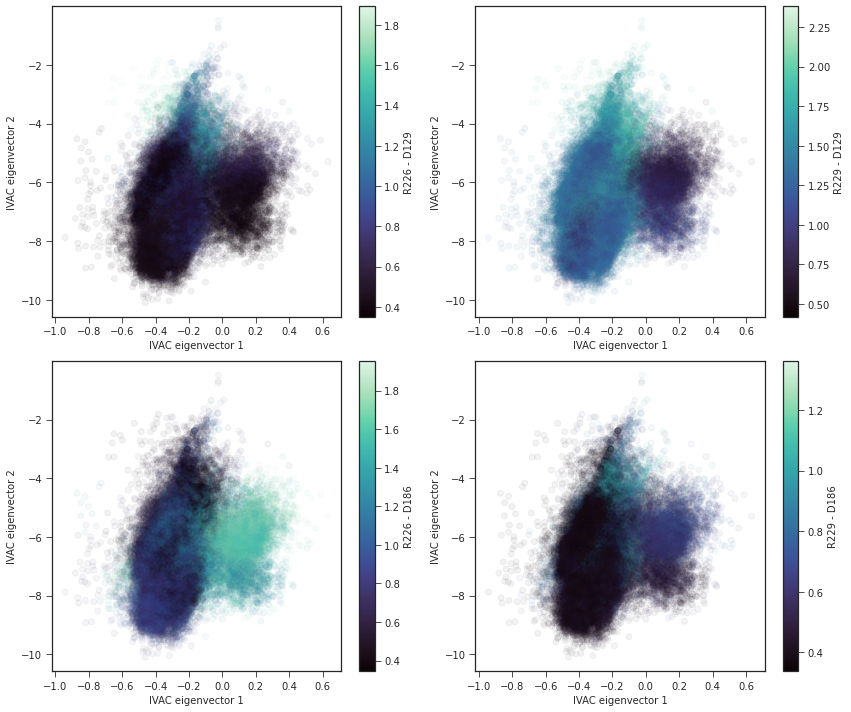

In [20]:
# project onto IVAC eigenvectors
f, axes = plt.subplots(2, 2, figsize=(12, 10))

start = 3000000
end = len(ivac_arr)
for i, (ax, j) in enumerate(zip(axes.flat, sb_ids)):
    h = ax.scatter(
        ivac_arr[start:end:s, 1],
        ivac_arr[start:end:s, 2],
        c=sb_arr[start:end:s, j],
        alpha=0.05,
        cmap="mako",
    )
    cbar = plt.colorbar(h, ax=ax, label=sb_labels[j - 30])
    cbar.solids.set(alpha=1)
    ax.set(xlabel="IVAC eigenvector 1", ylabel="IVAC eigenvector 2")

f.tight_layout()

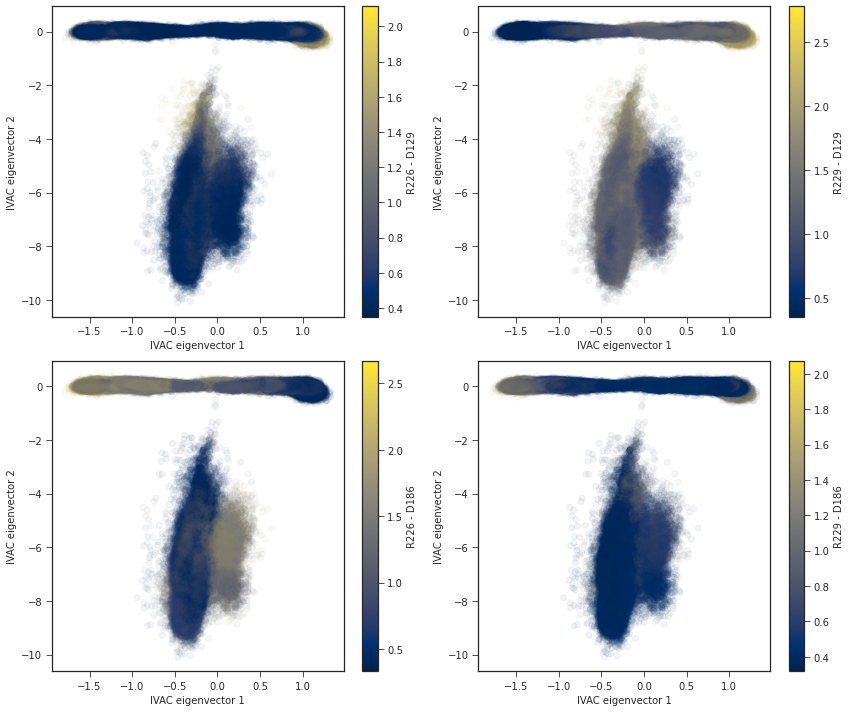

In [21]:
# project onto IVAC eigenvectors
f, axes = plt.subplots(2, 2, figsize=(12, 10))

start = 0
end = len(ivac_arr)
for i, (ax, j) in enumerate(zip(axes.flat, sb_ids)):
    h = ax.scatter(
        ivac_arr[start:end:s, 1],
        ivac_arr[start:end:s, 2],
        c=sb_arr[start:end:s, j],
        alpha=0.05,
        cmap="cividis",
    )
    cbar = plt.colorbar(h, ax=ax, label=sb_labels[j - 30])
    cbar.solids.set(alpha=1)
    ax.set(xlabel="IVAC eigenvector 1", ylabel="IVAC eigenvector 2")

f.tight_layout()

## Plot IVAC eigenvectors over trajectories

Text(0, 0.5, 'IVAC eigenvector 2')

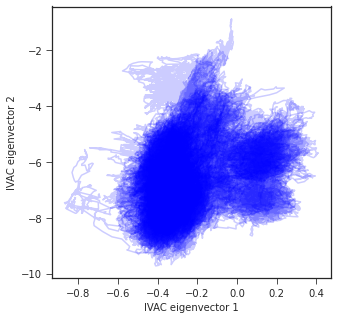

In [22]:
f = plt.figure(figsize=(5, 5))
for traj in ivac_trajs[237:]:
    N = 10
    moving_avg_1 = np.convolve(traj[:, 1], np.ones(N) / N, mode="valid")
    moving_avg_2 = np.convolve(traj[:, 2], np.ones(N) / N, mode="valid")
    plt.plot(moving_avg_1, moving_avg_2, color="blue", alpha=0.2)
plt.xlabel("IVAC eigenvector 1")
plt.ylabel("IVAC eigenvector 2")

In [23]:
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0, axis=0), axis=0)
    return (cumsum[N:] - cumsum[:-N]) / float(N)

Text(0, 0.5, 'IVAC eigenvector 2')

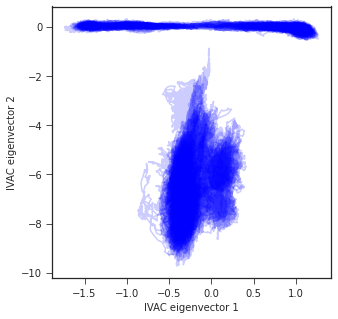

In [24]:
f = plt.figure(figsize=(5, 5))
for traj in ivac_trajs:
    N = 10
    moving_avg_1 = running_mean(traj[:, 1], N)
    moving_avg_2 = running_mean(traj[:, 2], N)
    plt.plot(moving_avg_1, moving_avg_2, color="blue", alpha=0.2)
plt.xlabel("IVAC eigenvector 1")
plt.ylabel("IVAC eigenvector 2")

## trajectories in IVAC space

In [25]:
# what are trajectories in upper right quadrant of supplemental blob?
start = 3000000
sort = np.argsort(np.abs(ivac_arr[start:, 1]) + np.abs(ivac_arr[start:, 2]))
print(sort[:10])

[96012 96011 96101 96000 96145 96001 96006 96384 96171 96003]


In [26]:
96011 // 3000

32

Text(0, 0.5, 'IVAC eigenvector 2')

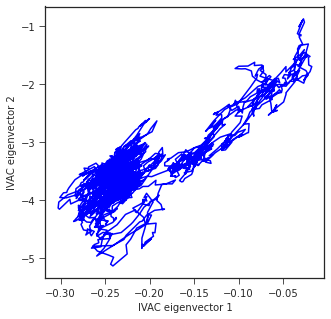

In [27]:
f = plt.figure(figsize=(5, 5))
traj = ivac_trajs[32 + 237]
N = 10
moving_avg_1 = running_mean(traj[:, 1], N)
moving_avg_2 = running_mean(traj[:, 2], N)
plt.plot(moving_avg_1, moving_avg_2, color="blue")
plt.xlabel("IVAC eigenvector 1")
plt.ylabel("IVAC eigenvector 2")

In [28]:
# right side
sort = np.argsort(np.abs(ivac_arr[start:, 1]))
print(sort[:10])

[211224 154313 377086   9234   9092 310013 246737 112594 104517 127339]


In [29]:
246737 % 3000

737

In [30]:
suppl_xtcs[82]

'../../suppl-runs/084/civsd_pro_2.xtc'

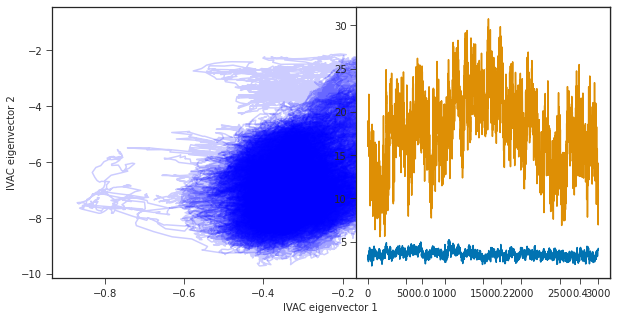

In [31]:
f = plt.figure(figsize=(10, 5))
for traj in ivac_trajs[237:]:
    N = 10
    moving_avg_1 = running_mean(traj[:, 1], N)
    moving_avg_2 = running_mean(traj[:, 2], N)
    plt.plot(moving_avg_1, moving_avg_2, color="blue", alpha=0.2)

i = 237 + 125
traj = ivac_trajs[i]
moving_avg_1 = running_mean(traj[:, 1], N)
moving_avg_2 = running_mean(traj[:, 2], N)
plt.plot(moving_avg_1, moving_avg_2, color="red")
plt.xlabel("IVAC eigenvector 1")
plt.ylabel("IVAC eigenvector 2")

ax = f.add_subplot(1, 2, 2)
ax.plot(cv_trajs[i][:, 0])
ax.plot(cv_trajs[i][:, 1])

Text(0, 0.5, 'IVAC eigenvector 2')

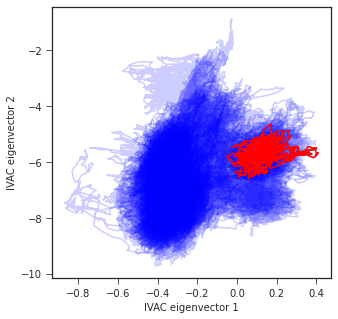

In [32]:
f = plt.figure(figsize=(5, 5))
for traj in ivac_trajs[237:]:
    N = 10
    moving_avg_1 = running_mean(traj[:, 1], N)
    moving_avg_2 = running_mean(traj[:, 2], N)
    plt.plot(moving_avg_1, moving_avg_2, color="blue", alpha=0.2)

traj = ivac_trajs[237 + 103]
moving_avg_1 = running_mean(traj[:, 1], N)
moving_avg_2 = running_mean(traj[:, 2], N)
plt.plot(moving_avg_1, moving_avg_2, color="red")
plt.xlabel("IVAC eigenvector 1")
plt.ylabel("IVAC eigenvector 2")

Text(0, 0.5, 'IVAC eigenvector 2')

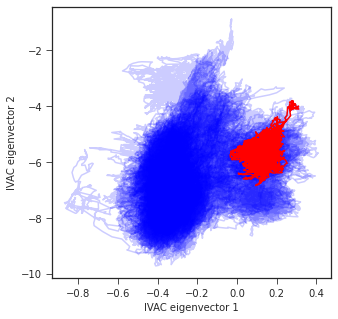

In [33]:
f = plt.figure(figsize=(5, 5))
for traj in ivac_trajs[237:]:
    N = 10
    moving_avg_1 = running_mean(traj[:, 1], N)
    moving_avg_2 = running_mean(traj[:, 2], N)
    plt.plot(moving_avg_1, moving_avg_2, color="blue", alpha=0.2)

traj = ivac_trajs[237 + 82]
moving_avg_1 = running_mean(traj[:, 1], N)
moving_avg_2 = running_mean(traj[:, 2], N)
plt.plot(moving_avg_1, moving_avg_2, color="red")
plt.xlabel("IVAC eigenvector 1")
plt.ylabel("IVAC eigenvector 2")

## projection onto salt bridge distances

In [34]:
from itertools import combinations

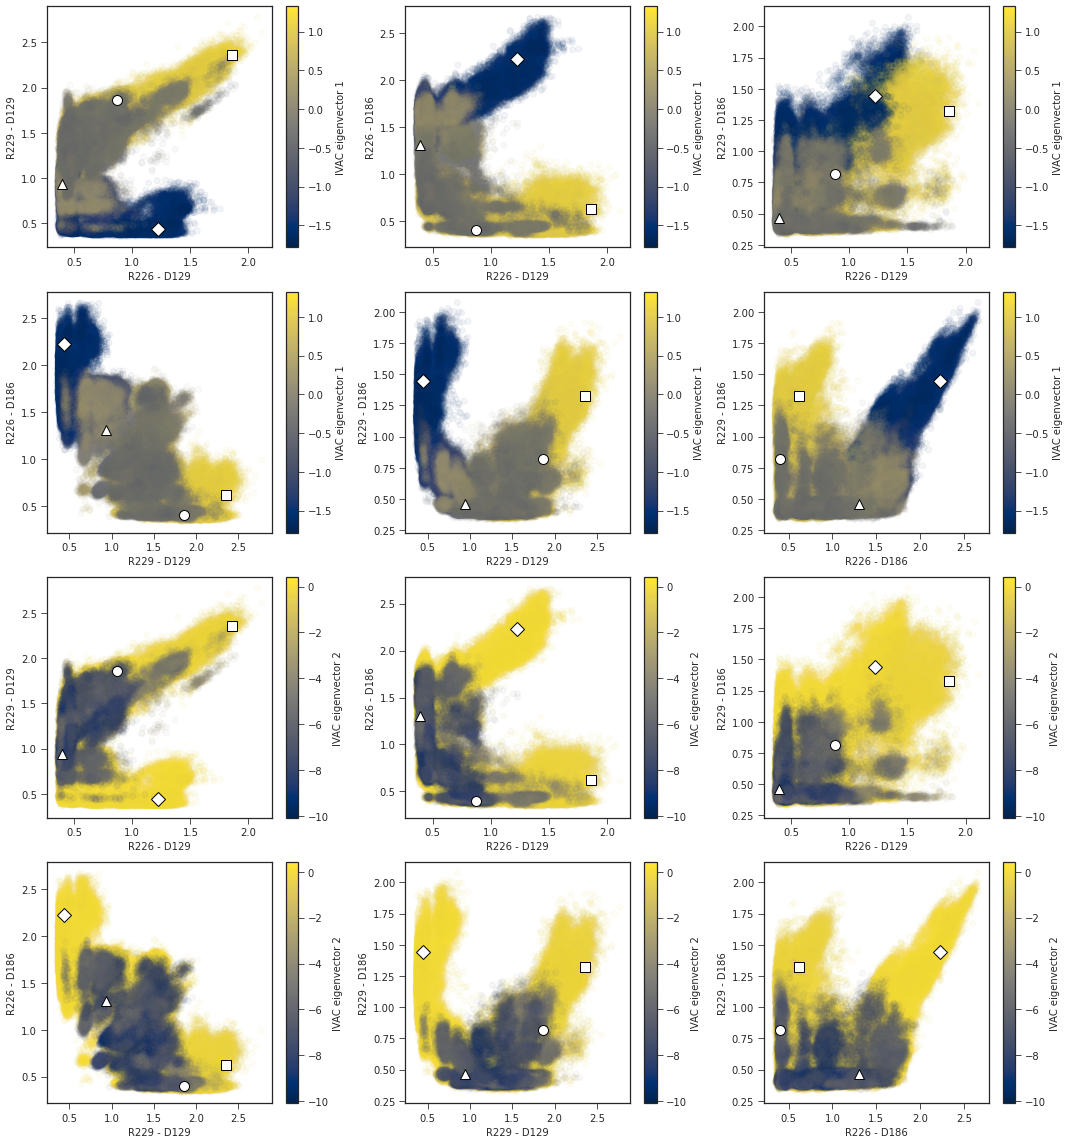

In [35]:
f, axes = plt.subplots(4, 3, figsize=(15, 16))
s = 10
pairs = [*combinations(sb_ids, 2), *combinations(sb_ids, 2)]
for i, (ax, (sb1, sb2)) in enumerate(zip(axes.flat, pairs)):
    ev = i // 6 + 1  # IVAC eigenvector index
    h = ax.scatter(
        sb_arr[::s, sb1],
        sb_arr[::s, sb2],
        c=ivac_arr[::s, ev],
        cmap="cividis",
        alpha=0.05,
    )
    ax.set_xlabel(sb_labels[sb1 - 30])
    ax.set_ylabel(sb_labels[sb2 - 30])
    cb = plt.colorbar(h, ax=ax, label=f"IVAC eigenvector {ev}")
    cb.solids.set(alpha=1)
plotting.plot_sb_models(axes.flat[:6], mode="du", centroids=True)
plotting.plot_sb_models(axes.flat[6:], mode="du", centroids=True)
f.tight_layout()

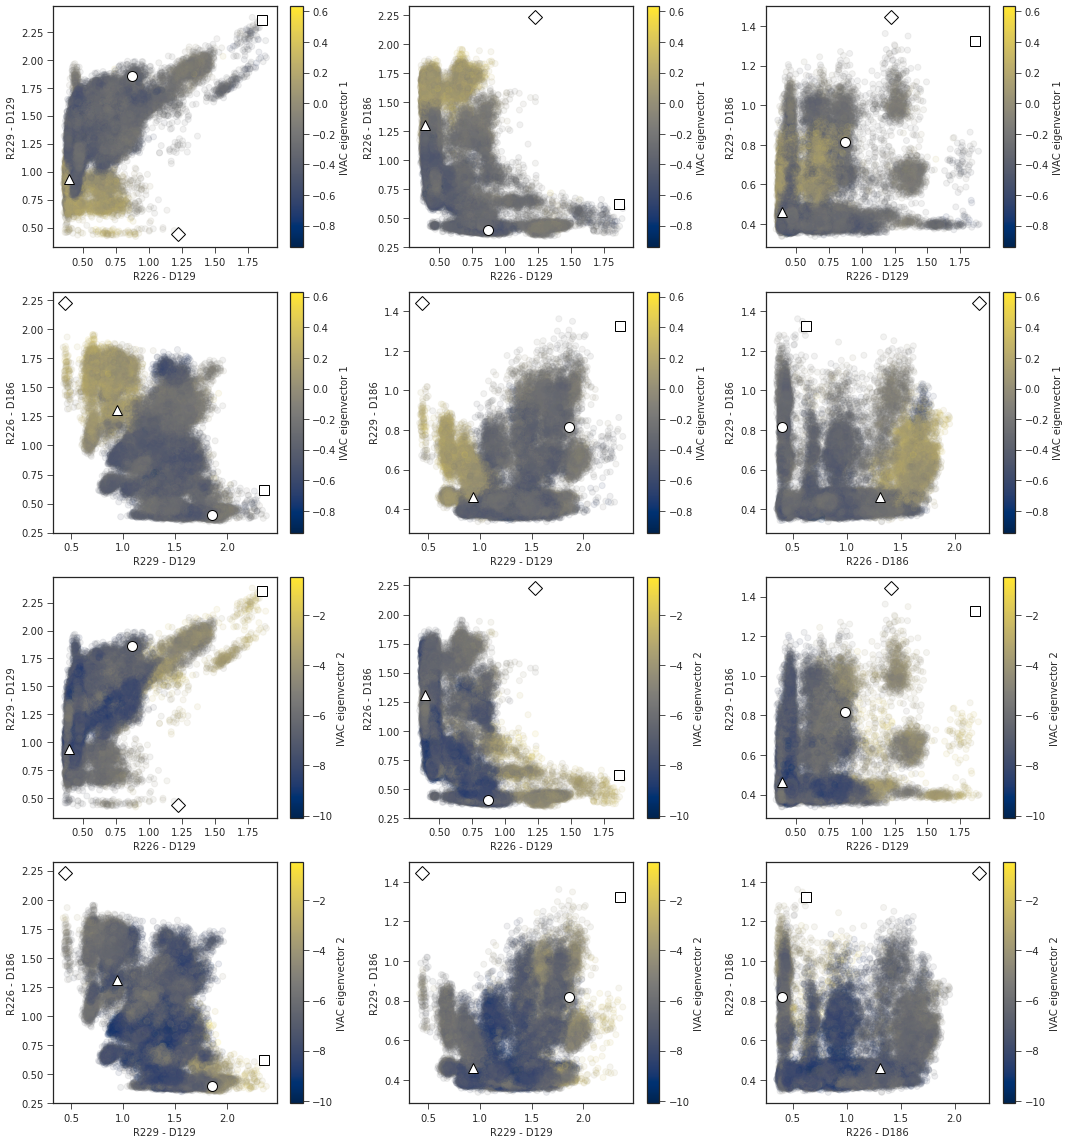

In [36]:
f, axes = plt.subplots(4, 3, figsize=(15, 16))
s = 10
st = 3_000_000
pairs = [*combinations(sb_ids, 2), *combinations(sb_ids, 2)]
for i, (ax, (sb1, sb2)) in enumerate(zip(axes.flat, pairs)):
    ev = i // 6 + 1  # IVAC eigenvector index
    h = ax.scatter(
        sb_arr[st::s, sb1],
        sb_arr[st::s, sb2],
        c=ivac_arr[st::s, ev],
        cmap="cividis",
        alpha=0.1,
    )
    ax.set_xlabel(sb_labels[sb1 - 30])
    ax.set_ylabel(sb_labels[sb2 - 30])
    cb = plt.colorbar(h, ax=ax, label=f"IVAC eigenvector {ev}")
    cb.solids.set(alpha=1)
plotting.plot_sb_models(axes.flat[:6], mode="du", centroids=True)
plotting.plot_sb_models(axes.flat[6:], mode="du", centroids=True)
f.tight_layout()

# 3rd IVAC eigenvector

In [37]:
from matplotlib.lines import Line2D

Text(0, 0.5, 'IVAC eigenvector 3')

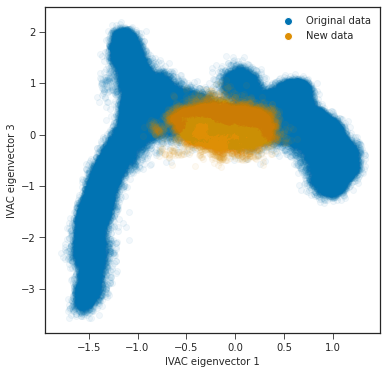

In [38]:
# third ivac eigenvector?
plt.figure(figsize=(6, 6))
plt.scatter(ivac_arr[:st:10, 1], ivac_arr[:st:10, 3], alpha=0.05)
st = 3_000_000
s = 5
plt.scatter(ivac_arr[st::s, 1], ivac_arr[st::s, 3], alpha=0.05)

leg_elements = [
    Line2D([0], [0], color="w", markerfacecolor="C0", marker="o", ms=8),
    Line2D([0], [0], color="w", markerfacecolor="C1", marker="o", ms=8),
]
plt.legend(leg_elements, ["Original data", "New data"])
plt.xlabel("IVAC eigenvector 1")
plt.ylabel("IVAC eigenvector 3")

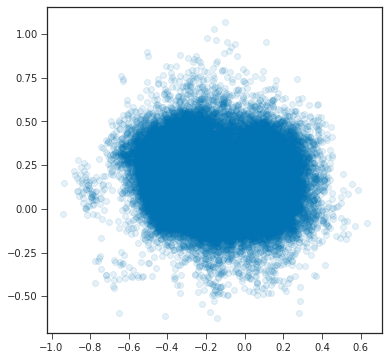

In [39]:
# third ivac eigenvector?
plt.figure(figsize=(6, 6))
st = 3_000_000
s = 5
plt.scatter(ivac_arr[st::s, 1], ivac_arr[st::s, 3], alpha=0.1)

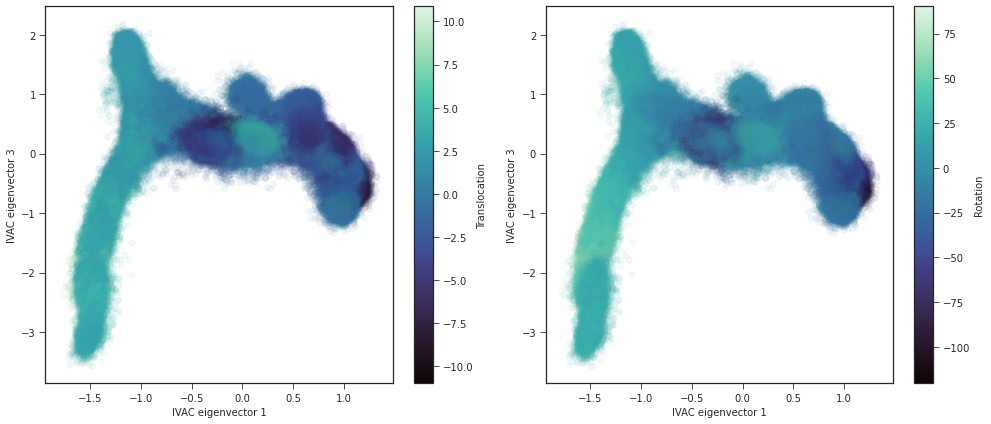

In [40]:
# project onto IVAC eigenvectors, 1 and 3
f, axes = plt.subplots(1, 2, figsize=(14, 6))
labels = ("Translocation", "Rotation")
start = 0
end = len(ivac_arr)
for i, ax in enumerate(axes):
    h0 = ax.scatter(
        ivac_arr[start:end:10, 1],
        ivac_arr[start:end:10, 3],
        c=cv_arr[start::10, i],
        alpha=0.05,
        cmap="mako",
    )
    cbar = plt.colorbar(h0, ax=ax, label=labels[i])
    cbar.solids.set(alpha=1)
    ax.set(xlabel="IVAC eigenvector 1", ylabel="IVAC eigenvector 3")

f.tight_layout()

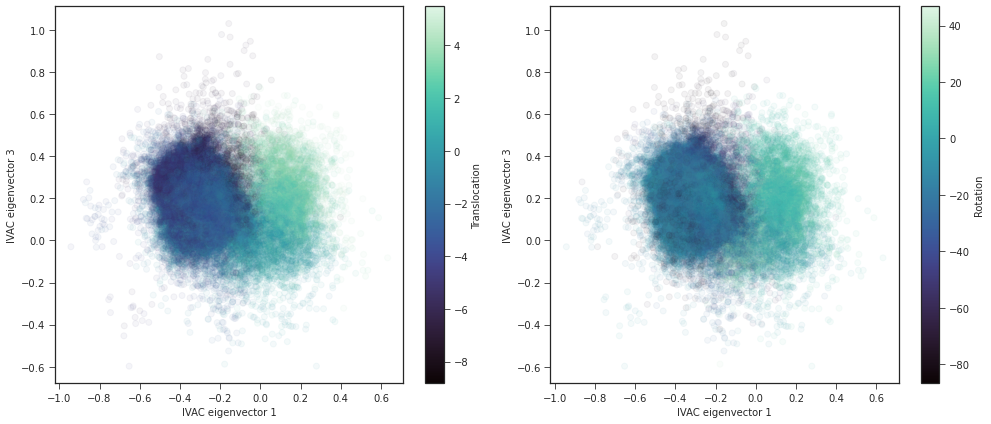

In [41]:
# project onto IVAC eigenvectors, 1 and 3
f, axes = plt.subplots(1, 2, figsize=(14, 6))
labels = ("Translocation", "Rotation")
start = 3_000_000
end = len(ivac_arr)
for i, ax in enumerate(axes):
    h0 = ax.scatter(
        ivac_arr[start:end:10, 1],
        ivac_arr[start:end:10, 3],
        c=cv_arr[start::10, i],
        alpha=0.05,
        cmap="mako",
    )
    cbar = plt.colorbar(h0, ax=ax, label=labels[i])
    cbar.solids.set(alpha=1)
    ax.set(xlabel="IVAC eigenvector 1", ylabel="IVAC eigenvector 3")

f.tight_layout()

# why is the correlation reversed?

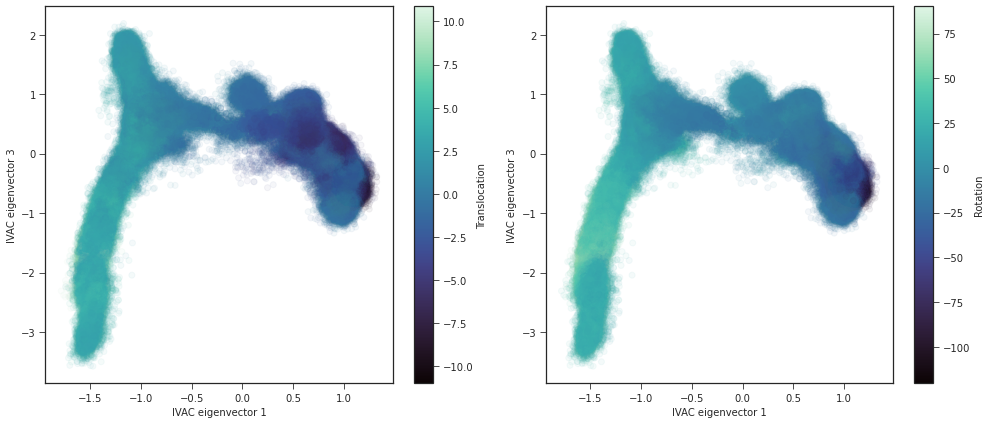

In [42]:
# project onto IVAC eigenvectors, 1 and 3
f, axes = plt.subplots(1, 2, figsize=(14, 6))
labels = ("Translocation", "Rotation")
start = 0
end = 3_000_000
for i, ax in enumerate(axes):
    h0 = ax.scatter(
        ivac_arr[start:end:10, 1],
        ivac_arr[start:end:10, 3],
        c=cv_arr[start:end:10, i],
        alpha=0.05,
        cmap="mako",
    )
    cbar = plt.colorbar(h0, ax=ax, label=labels[i])
    cbar.solids.set(alpha=1)
    ax.set(xlabel="IVAC eigenvector 1", ylabel="IVAC eigenvector 3")

f.tight_layout()

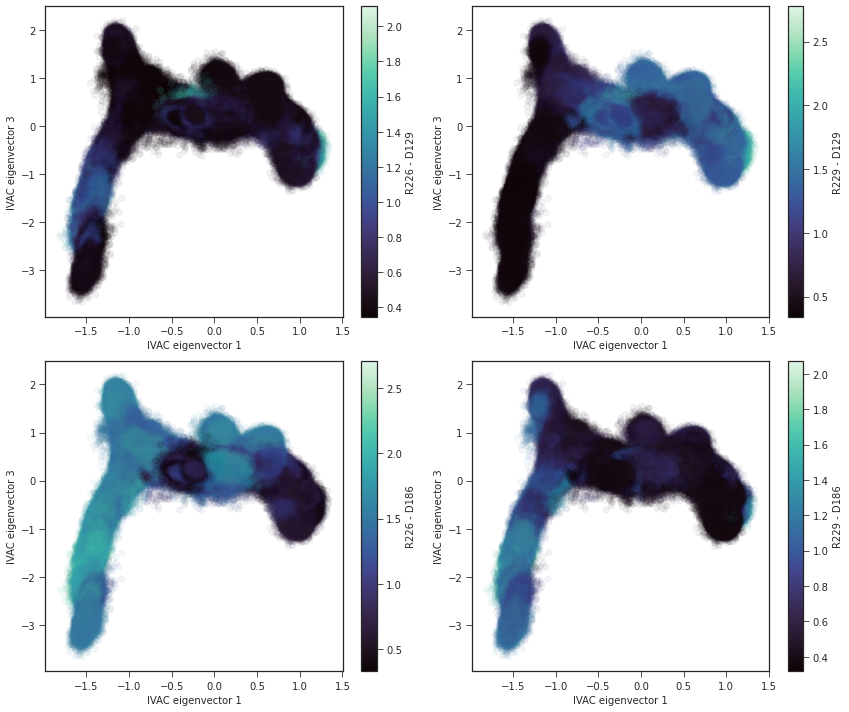

In [43]:
# project onto IVAC eigenvectors
f, axes = plt.subplots(2, 2, figsize=(12, 10))

start = 0
end = len(ivac_arr)
for i, (ax, j) in enumerate(zip(axes.flat, sb_ids)):
    h = ax.scatter(
        ivac_arr[start:end:s, 1],
        ivac_arr[start:end:s, 3],
        c=sb_arr[start:end:s, j],
        alpha=0.05,
        cmap="mako",
    )
    cbar = plt.colorbar(h, ax=ax, label=sb_labels[j - 30])
    cbar.solids.set(alpha=1)
    ax.set(xlabel="IVAC eigenvector 1", ylabel="IVAC eigenvector 3")

f.tight_layout()

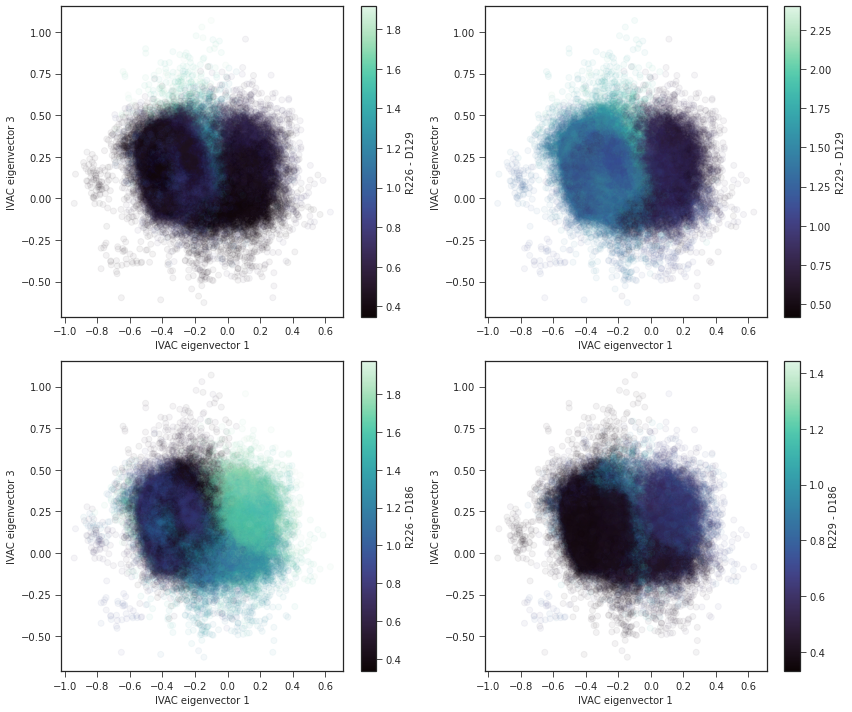

In [44]:
# project salt bridges onto IVAC eigenvectors 1 and 3
# only new data
f, axes = plt.subplots(2, 2, figsize=(12, 10))

start = 3_000_000
end = len(ivac_arr)
for i, (ax, j) in enumerate(zip(axes.flat, sb_ids)):
    h = ax.scatter(
        ivac_arr[start:end:s, 1],
        ivac_arr[start:end:s, 3],
        c=sb_arr[start:end:s, j],
        alpha=0.05,
        cmap="mako",
    )
    cbar = plt.colorbar(h, ax=ax, label=sb_labels[j - 30])
    cbar.solids.set(alpha=1)
    ax.set(xlabel="IVAC eigenvector 1", ylabel="IVAC eigenvector 3")

f.tight_layout()

## 4th eigenvector

Text(0, 0.5, 'IVAC eigenvector 4')

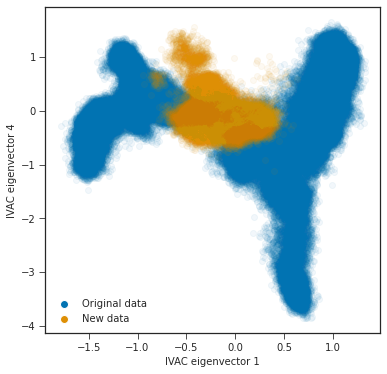

In [45]:
# fourth ivac eigenvector?
plt.figure(figsize=(6, 6))
plt.scatter(ivac_arr[:st:10, 1], ivac_arr[:st:10, 4], alpha=0.05)
st = 3_000_000
s = 5
plt.scatter(ivac_arr[st::s, 1], ivac_arr[st::s, 4], alpha=0.05)

leg_elements = [
    Line2D([0], [0], color="w", markerfacecolor="C0", marker="o", ms=8),
    Line2D([0], [0], color="w", markerfacecolor="C1", marker="o", ms=8),
]
plt.legend(leg_elements, ["Original data", "New data"])
plt.xlabel("IVAC eigenvector 1")
plt.ylabel("IVAC eigenvector 4")

# why is there

Text(0, 0.5, 'IVAC eigenvector 4')

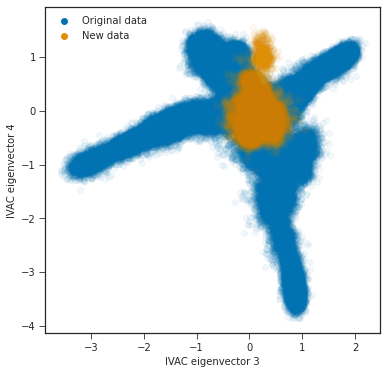

In [46]:
# fourth ivac eigenvector?
plt.figure(figsize=(6, 6))
plt.scatter(ivac_arr[:st:10, 3], ivac_arr[:st:10, 4], alpha=0.05)
st = 3_000_000
s = 5
plt.scatter(ivac_arr[st::s, 3], ivac_arr[st::s, 4], alpha=0.05)

leg_elements = [
    Line2D([0], [0], color="w", markerfacecolor="C0", marker="o", ms=8),
    Line2D([0], [0], color="w", markerfacecolor="C1", marker="o", ms=8),
]
plt.legend(leg_elements, ["Original data", "New data"])
plt.xlabel("IVAC eigenvector 3")
plt.ylabel("IVAC eigenvector 4")

In [47]:
# what are the points that are "disconnected" in the plot against the 1st and 4th eigenvectors
# e.g. near (-0.25, -0.5)
ids = np.argsort((ivac_arr[:, 1] + 0.25) ** 2 + (ivac_arr[:, 4] + 0.5) ** 2)
for i in ids[:20]:
    if i < 3_000_000:
        print("Anton", util.anton_frame(i))
    else:
        traj = (i - 3_000_000) // 3000
        print(f"New ({traj}, {(i - 3_000_000) % 3000})\t {suppl_xtcs[traj]}")

New (108, 77)	 ../../suppl-runs/089/civsd_pro_3.xtc
New (129, 742)	 ../../suppl-runs/089/civsd_pro_4.xtc
Anton (196, 6373)
New (7, 794)	 ../../suppl-runs/090/civsd_pro.xtc
New (112, 1454)	 ../../suppl-runs/093/civsd_pro_3.xtc
New (117, 2895)	 ../../suppl-runs/098/civsd_pro_3.xtc
New (112, 1439)	 ../../suppl-runs/093/civsd_pro_3.xtc
New (88, 401)	 ../../suppl-runs/090/civsd_pro_2.xtc
New (113, 1837)	 ../../suppl-runs/094/civsd_pro_3.xtc
New (7, 2587)	 ../../suppl-runs/090/civsd_pro.xtc
New (6, 1178)	 ../../suppl-runs/089/civsd_pro.xtc
New (139, 627)	 ../../suppl-runs/099/civsd_pro_4.xtc
New (113, 2286)	 ../../suppl-runs/094/civsd_pro_3.xtc
New (130, 985)	 ../../suppl-runs/090/civsd_pro_4.xtc
New (118, 208)	 ../../suppl-runs/099/civsd_pro_3.xtc
New (16, 2699)	 ../../suppl-runs/099/civsd_pro.xtc
New (139, 1597)	 ../../suppl-runs/099/civsd_pro_4.xtc
Anton (196, 6720)
New (112, 1363)	 ../../suppl-runs/093/civsd_pro_3.xtc
New (78, 1233)	 ../../suppl-runs/161/civsd_pro.xtc


Text(0, 0.5, 'IVAC eigenvector 4')

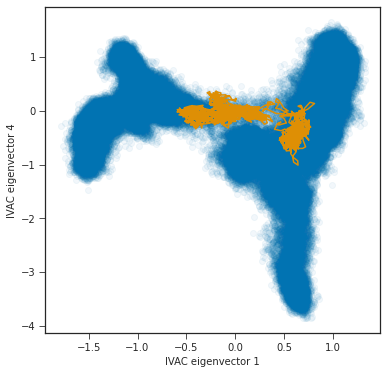

In [48]:
plt.figure(figsize=(6, 6))
plt.scatter(ivac_arr[:st:10, 1], ivac_arr[:st:10, 4], alpha=0.05)

traj_sm = running_mean(ivac_trajs[196], N)
plt.plot(traj_sm[::s, 1], traj_sm[::s, 4], color="C1")

plt.xlabel("IVAC eigenvector 1")
plt.ylabel("IVAC eigenvector 4")

## Try reducing input dimensionality

In [49]:
with np.load("../../data/raw_feat/feat5_suppl_00.npz") as f:
    suppl_feat5 = f["arr_0"]
# load old feature 5 data
with np.load("../../data/raw_feat/feat5_raw.npz", allow_pickle=True) as f:
    feat5_trajs = f["arr_0"]
feat5_trajs = list(feat5_trajs)
for idx in sorted(remove, reverse=True):
    del feat5_trajs[idx]
feat5_trajs = [*feat5_trajs[1000:], *suppl_feat5]
print(len(feat5_trajs), feat5_trajs[0].shape)

381 (10000, 1924)


In [56]:
subsampl5_feat5 = [traj[:, ::5] for traj in feat5_trajs]

In [57]:
livac_sub5 = ivac.LinearIVAC(
    minlag=1, maxlag=10000, nevecs=10, addones=False, adjust=True
)
livac_sub5.fit(subsampl5_feat5)
sub5_ivac_trajs = livac_sub5.transform(subsampl5_feat5)

In [58]:
sub5_ivac_arr = np.concatenate(sub5_ivac_trajs)
print(sub5_ivac_arr.shape)

(3432000, 10)


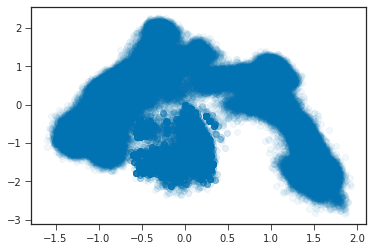

In [60]:
st = len(sub5_ivac_arr)
plt.scatter(sub5_ivac_arr[:st:10, 1], sub5_ivac_arr[:st:10, 2], alpha=0.05)

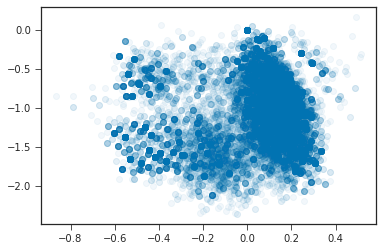

In [61]:
st = 3_000_000
plt.scatter(sub5_ivac_arr[st::10, 1], sub5_ivac_arr[st::10, 2], alpha=0.05)

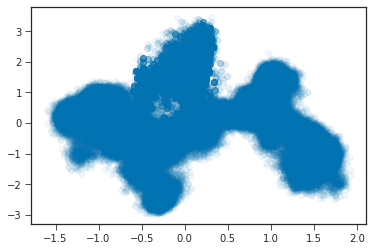

In [62]:
st = len(sub5_ivac_arr)
plt.scatter(sub5_ivac_arr[:st:10, 1], sub5_ivac_arr[:st:10, 3], alpha=0.05)

# Extract structures along 2nd eigenvector

In [12]:
ivac_arr = np.concatenate(ivac_trajs)

In [16]:
i = 0  # first eigenvector
k = 0  # third eigenvector
ids = []
for j in range(0, -11, -1):
    # first three columns of ivac data
    ids.append(util.find_closest_points((i, j, k), ivac_arr[:, 1:4])[0])

In [21]:
structs = np.empty((len(ids), 2))
file_frame = []
for i, idx in enumerate(ids):
    if idx < 3_000_000:
        traj, frame = util.anton_frame(idx)
        structs[i] = (traj, frame)
        file_frame.append(
            (f"/project2/roux/scguo/ci-vsd/anton/xtc1000ns/civsd-{traj}.xtc", frame)
        )
    else:
        traj = (idx - 3_000_000) // 3000
        frame = (idx - 3_000_000) % 3000
        structs[i] = (traj, frame)
        file_frame.append((suppl_xtcs[i], frame))

In [20]:
structs

array([[ 121., 1708.],
       [  32.,  141.],
       [  30.,  978.],
       [  50.,  601.],
       [  23., 2521.],
       [  52.,  595.],
       [  22.,  415.],
       [  42.,  149.],
       [  40., 2878.],
       [  54., 1669.],
       [ 133., 2680.]])

In [40]:
ivac_arr[ids[4], 1:4]

array([-5.94723051e-04, -3.99328558e+00, -1.72143224e-02])

In [22]:
file_frame

[('/project2/roux/scguo/ci-vsd/anton/xtc1000ns/civsd-121.xtc', 1708),
 ('../../suppl-runs/084/civsd_pro.xtc', 141),
 ('../../suppl-runs/085/civsd_pro.xtc', 978),
 ('../../suppl-runs/086/civsd_pro.xtc', 601),
 ('../../suppl-runs/087/civsd_pro.xtc', 2521),
 ('../../suppl-runs/088/civsd_pro.xtc', 595),
 ('../../suppl-runs/089/civsd_pro.xtc', 415),
 ('../../suppl-runs/090/civsd_pro.xtc', 149),
 ('../../suppl-runs/091/civsd_pro.xtc', 2878),
 ('../../suppl-runs/092/civsd_pro.xtc', 1669),
 ('../../suppl-runs/093/civsd_pro.xtc', 2680)]

In [23]:
import mdtraj as md

In [30]:
topfile = "../../civsd-pro.pdb"
sts = md.load_xtc(file_frame[0][0], top=topfile, frame=file_frame[0][1])
for i, (file, frame) in enumerate(file_frame[1:]):
    fr = md.load_xtc(file, top=topfile, frame=frame)
    sts = sts.join(fr)

In [31]:
sts

<mdtraj.Trajectory with 11 frames, 2192 atoms, 134 residues, and unitcells at 0x7ff9e77674d0>

In [35]:
sts.save_dcd("../../models/ivac_sts/00_xx_00.dcd")

In [36]:
def save_ivac_structures(i, k, outfile):
    topfile = "../../civsd-pro.pdb"
    for j in range(0, -11, -1):
        # first three columns of ivac data
        idx = util.find_closest_points((i, j, k), ivac_arr[:, 1:4])[0]

        if idx < 3_000_000:
            traj, frame = util.anton_frame(idx)
            file = f"/project2/roux/scguo/ci-vsd/anton/xtc1000ns/civsd-{traj}.xtc"
        else:
            traj = (idx - 3_000_000) // 3000
            frame = (idx - 3_000_000) % 3000
            file = suppl_xtcs[traj]

        if j == 0:
            sts = md.load_xtc(file_frame[0][0], top=topfile, frame=file_frame[0][1])
        else:
            fr = md.load_xtc(file, top=topfile, frame=frame)
            sts = sts.join(fr)
    sts.save_dcd(outfile)

In [37]:
save_ivac_structures(-0.2, 0, "../../models/ivac_sts/-02_xx_00.dcd")

In [38]:
save_ivac_structures(-0.4, 0, "../../models/ivac_sts/-04_xx_00.dcd")

# New data histograms

In [41]:
sb_ids = [42, 48, 47, 53]

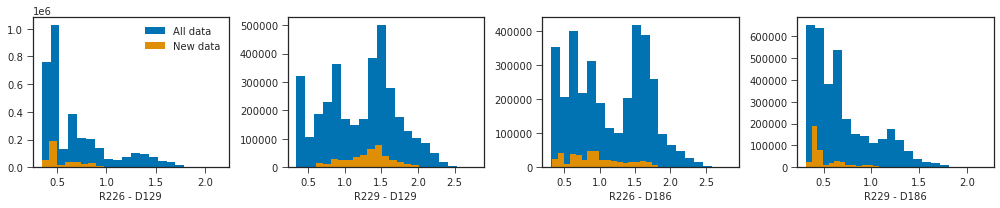

In [47]:
f, axs = plt.subplots(1, 4, figsize=(14, 3))
for ix, ax in zip(sb_ids, axs):
    ax.hist(sb_arr[:, ix], bins=20)
    ax.hist(sb_arr[st:, ix], bins=20)
    ax.set_xlabel(sb_labels[ix - 30])
axs[0].legend(["All data", "New data"])
f.tight_layout()

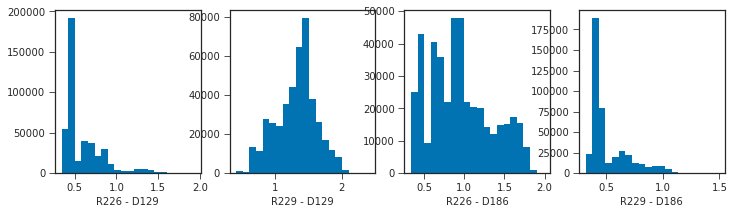

In [43]:
f, axs = plt.subplots(1, 4, figsize=(12, 3))
st = 3_000_000
for ix, ax in zip(sb_ids, axs):
    ax.hist(sb_arr[st:, ix], bins=20)
    ax.set_xlabel(sb_labels[ix - 30])